In [51]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
os.chdir('/content/drive/My Drive/문서/수업자료/SE/comento_data_analysis/data')
os.getcwd()

'/content/drive/My Drive/문서/수업자료/SE/comento_data_analysis/data'

In [54]:
raw_house_train = pd.read_csv('train.csv',engine = 'python',na_filter=False)
raw_house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NA,Attchd,1950,Unf,1,240,TA,TA

In [55]:
raw_house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [56]:
raw_house_train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 데이터 자료형 변환

In [57]:
catColNames = [
'MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour','LotConfig', 'Neighborhood', 'Condition1','Condition2', 'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'
]
ordColNames = [
'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual','BsmtCond', 'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence'
]

In [58]:
len(catColNames + ordColNames)

46

In [59]:
for name in catColNames:
  if name not in raw_house_train.columns:
    print(f'{name} is not a column.')

for name in ordColNames:
  if name not in raw_house_train.columns:
    print(f'{name} is not a column.')


In [60]:
catCols = raw_house_train.loc[:,catColNames + ordColNames].astype('category')

In [61]:
catCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   Street         1460 non-null   category
 3   Alley          1460 non-null   category
 4   LotShape       1460 non-null   category
 5   LandContour    1460 non-null   category
 6   LotConfig      1460 non-null   category
 7   Neighborhood   1460 non-null   category
 8   Condition1     1460 non-null   category
 9   Condition2     1460 non-null   category
 10  BldgType       1460 non-null   category
 11  HouseStyle     1460 non-null   category
 12  RoofStyle      1460 non-null   category
 13  RoofMatl       1460 non-null   category
 14  Exterior1st    1460 non-null   category
 15  Exterior2nd    1460 non-null   category
 16  MasVnrType     1460 non-null   category
 17  Foundation     1460 non-null   ca

In [62]:
numCols = raw_house_train.drop(catCols,axis=1)

In [63]:
#numCols.astype('int32')

In [64]:
numCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   LotFrontage    1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   YearBuilt      1460 non-null   int64 
 4   YearRemodAdd   1460 non-null   int64 
 5   MasVnrArea     1460 non-null   object
 6   BsmtFinSF1     1460 non-null   int64 
 7   BsmtFinSF2     1460 non-null   int64 
 8   BsmtUnfSF      1460 non-null   int64 
 9   TotalBsmtSF    1460 non-null   int64 
 10  1stFlrSF       1460 non-null   int64 
 11  2ndFlrSF       1460 non-null   int64 
 12  LowQualFinSF   1460 non-null   int64 
 13  GrLivArea      1460 non-null   int64 
 14  BsmtFullBath   1460 non-null   int64 
 15  BsmtHalfBath   1460 non-null   int64 
 16  FullBath       1460 non-null   int64 
 17  HalfBath       1460 non-null   int64 
 18  BedroomAbvGr   1460 non-null

In [65]:
numeric_features = list(numCols.columns)
numeric_features

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [66]:
conv_df = pd.concat([catCols, numCols], axis=1, sort=False)

In [67]:
conv_df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,...,FireplaceQu,GarageQual,GarageCond,PoolQC,Fence,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,Pave,NA,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GasA,Y,SBrkr,Attchd,RFn,Y,NA,WD,Normal,AllPub,Gtl,7,5,Gd,TA,Gd,TA,GLQ,Unf,Ex,Gd,...,NA,TA,TA,NA,NA,1,65,8450,2003,2003,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,Pave,NA,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,Gd,GasA,Y,SBrkr,Attchd,RFn,Y,NA,WD,Normal,AllPub,Gtl,6,8,TA,TA,Gd,TA,ALQ,Unf,Ex,TA,...,TA,TA,TA,NA,NA,2,80,9600,1976,1976,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,Pave,NA,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GasA,Y,SBrkr,Attchd,RFn,Y,NA,WD,Normal,AllPub,Gtl,7,5,Gd,TA,Gd,TA,GLQ,Unf,Ex,Gd,...,TA,TA,TA,NA,NA,3,68,11250,2001,2002,162,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,Pave,NA,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,No,GasA,Y,SBrkr,Detchd,Unf,Y,NA,WD,Abnorml,AllPub,Gtl,7,5,TA,TA,TA,Gd,ALQ,Unf,Gd,Gd,...,Gd,TA,TA,NA,NA,4,60,9550,1915,1970,0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,Pave,NA,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GasA,Y,SBrkr,Attchd,RFn,Y,NA,WD,Normal,AllPub,Gtl,8,5,Gd,TA,Gd,TA,GLQ,Unf,Ex,Gd,...,TA,TA,TA,NA,NA,5,84,14260,2000,2000,350,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000


결측치가 있는 열들

In [68]:
num_rows = conv_df.shape[0]
num_missing = num_rows - conv_df.count()
missing_ind = num_missing.to_numpy().nonzero()
missing_attr = num_missing.iloc[missing_ind]

In [69]:
for name in catCols:
  print('=========')
  print(name)
  print(conv_df[name].value_counts(dropna=False).sort_index())

MSSubClass
20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSSubClass, dtype: int64
MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: MSZoning, dtype: int64
Street
Grvl       6
Pave    1454
Name: Street, dtype: int64
Alley
Grvl      50
NA      1369
Pave      41
Name: Alley, dtype: int64
LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: LotShape, dtype: int64
LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: LandContour, dtype: int64
LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: LotConfig, dtype: int64
Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     

In [70]:
def check_num(x):
    try:
        float(x)
        return False        
    except ValueError:
        return True

In [71]:
conv_df['MiscVal'].tail()

1455       0
1456       0
1457    2500
1458       0
1459       0
Name: MiscVal, dtype: int64

In [72]:
for name in numCols:
  namask = conv_df[name] == np.nan
  zeromask = (conv_df[name] == 0) | (conv_df[name] == '0')
  #print(zeromask)
  if namask.sum() == 0 :
    continue
  print('=========')
  print(f'# of non-numerics in {name}: {namask.sum()}')
  print(f'# of 0s in {name}: {zeromask.sum()}')
  umask = namask | zeromask
  print(conv_df[umask][name].value_counts(dropna=False).sort_index())

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [73]:
conv_df[conv_df['LotFrontage'] == 0]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,...,FireplaceQu,GarageQual,GarageCond,PoolQC,Fence,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice


In [74]:
lfNAs=conv_df.loc[conv_df['LotFrontage']=='NA',['Street','Alley','LotConfig']]

In [75]:
for col in ['Street','Alley','LotConfig']:
  print(f'========{col}==========')
  print(conv_df[col].value_counts(dropna=False).sort_index())

========Street==========
Grvl       6
Pave    1454
Name: Street, dtype: int64
========Alley==========
Grvl      50
NA      1369
Pave      41
Name: Alley, dtype: int64
========LotConfig==========
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: LotConfig, dtype: int64


## 데이터에 대한 전반적 파악 (기술통계 및 그래프 작성)

### 정량 데이터에 대한 빈도 파악

In [76]:
def get_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = conv_df.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = conv_df.select_dtypes(include=['category']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

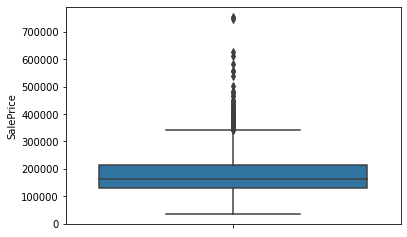

In [77]:
sns.boxplot('SalePrice', data=conv_df, orient="v")

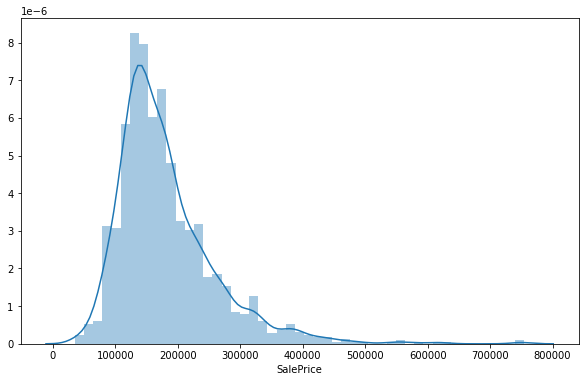

In [78]:
# Let's start with our dependent variable, SalePrice
plt.figure(figsize=(10,6))
sns.distplot(conv_df.SalePrice)
plt.show()

In [79]:
conv_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [80]:
print(f'skew:{conv_df.SalePrice.skew()},kurtosis:{conv_df.SalePrice.kurtosis()}')

skew:1.8828757597682129,kurtosis:6.536281860064529


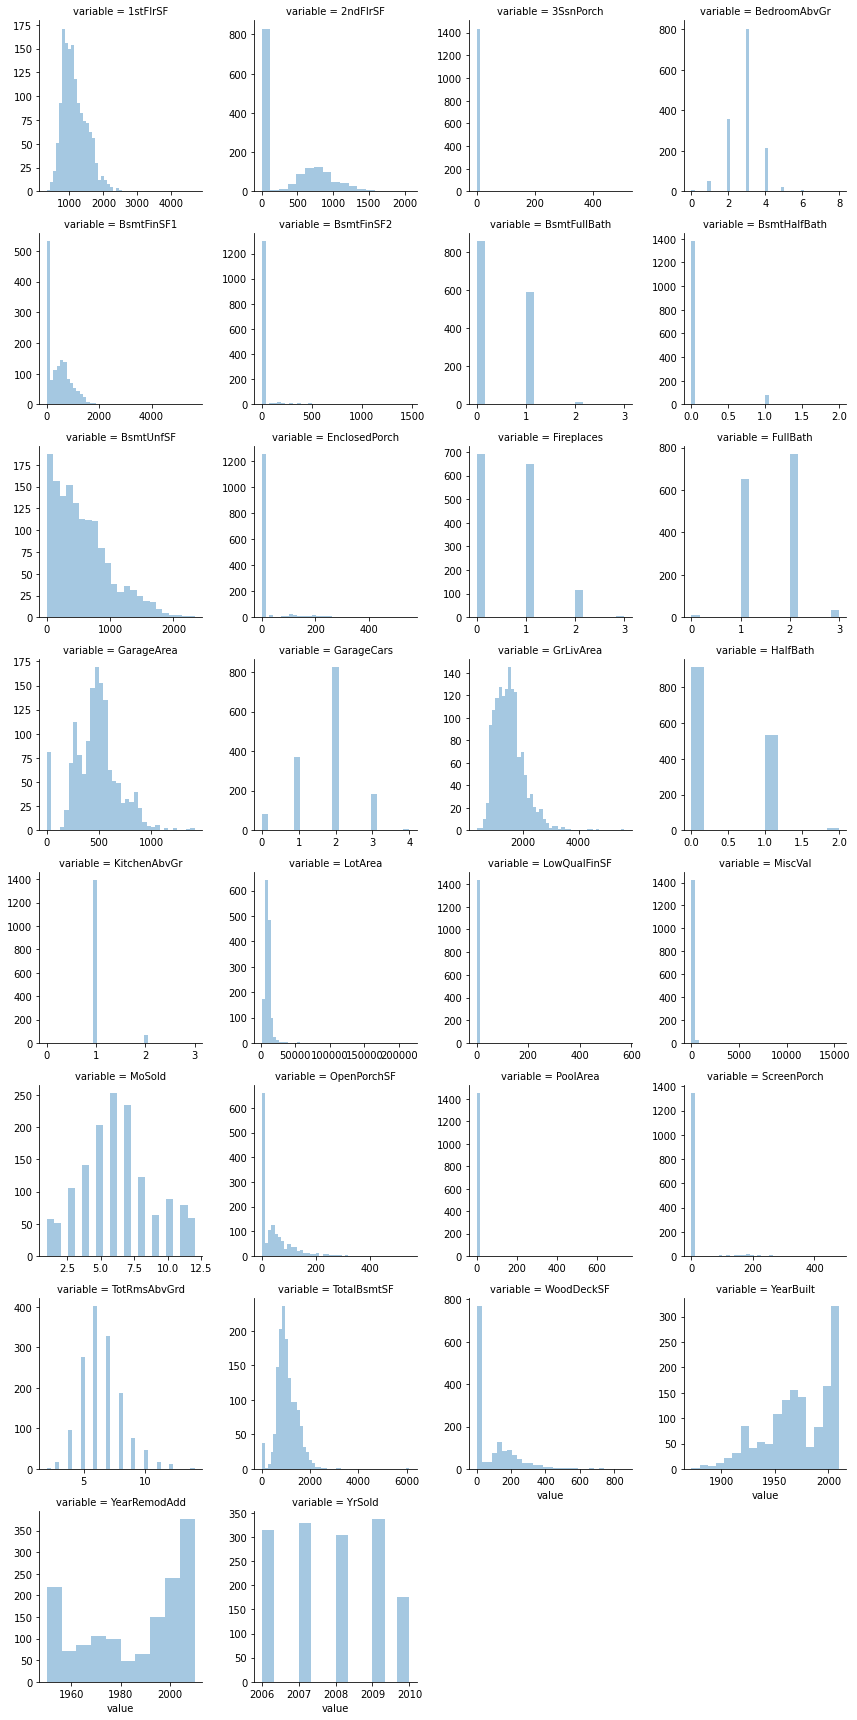

In [81]:
# Grid of distribution plots of all numerical features
f = pd.melt(conv_df, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value',kde=False)

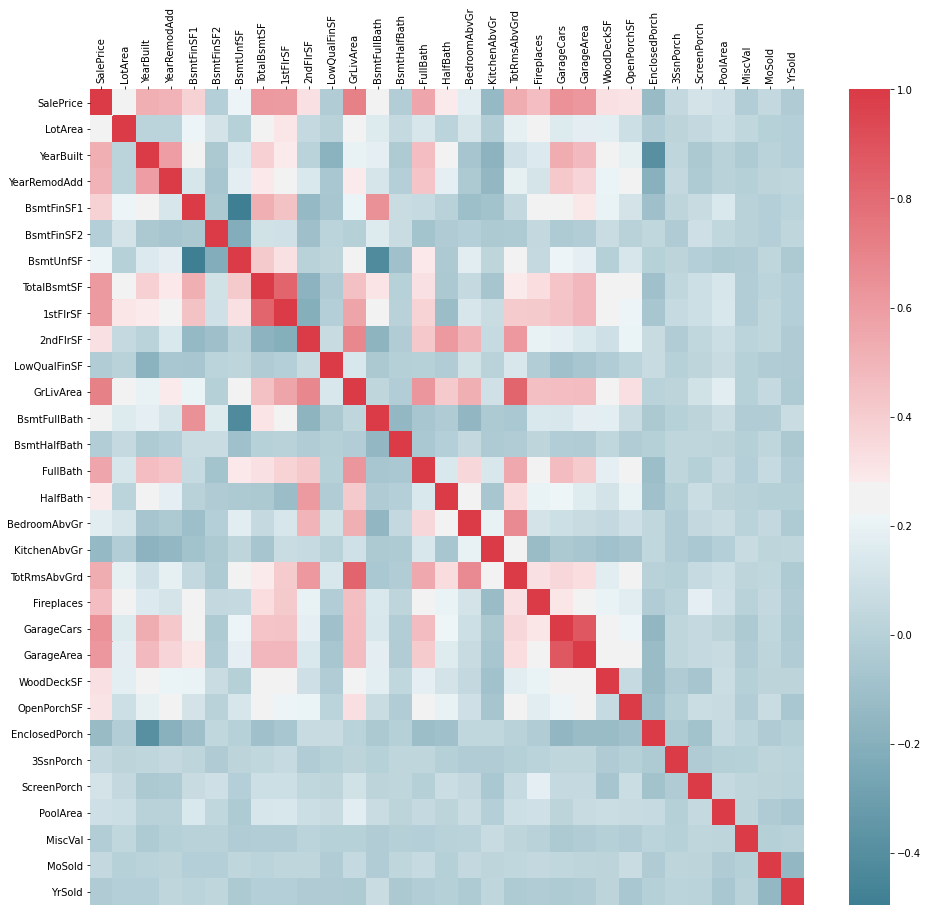

In [82]:
# Let's take a look at the correlation between numerical features
corr = conv_df[['SalePrice'] + num_features].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

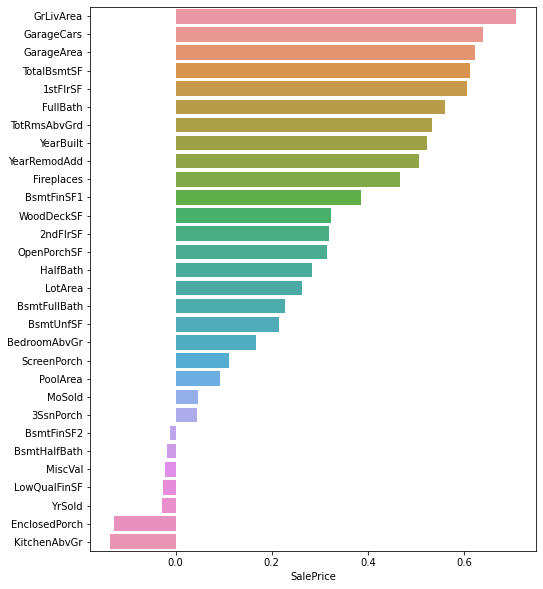

In [83]:
# Feature sorted by correlation to SalePrice, from positive to negative
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

### 정성 데이터에 대한 빈도

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


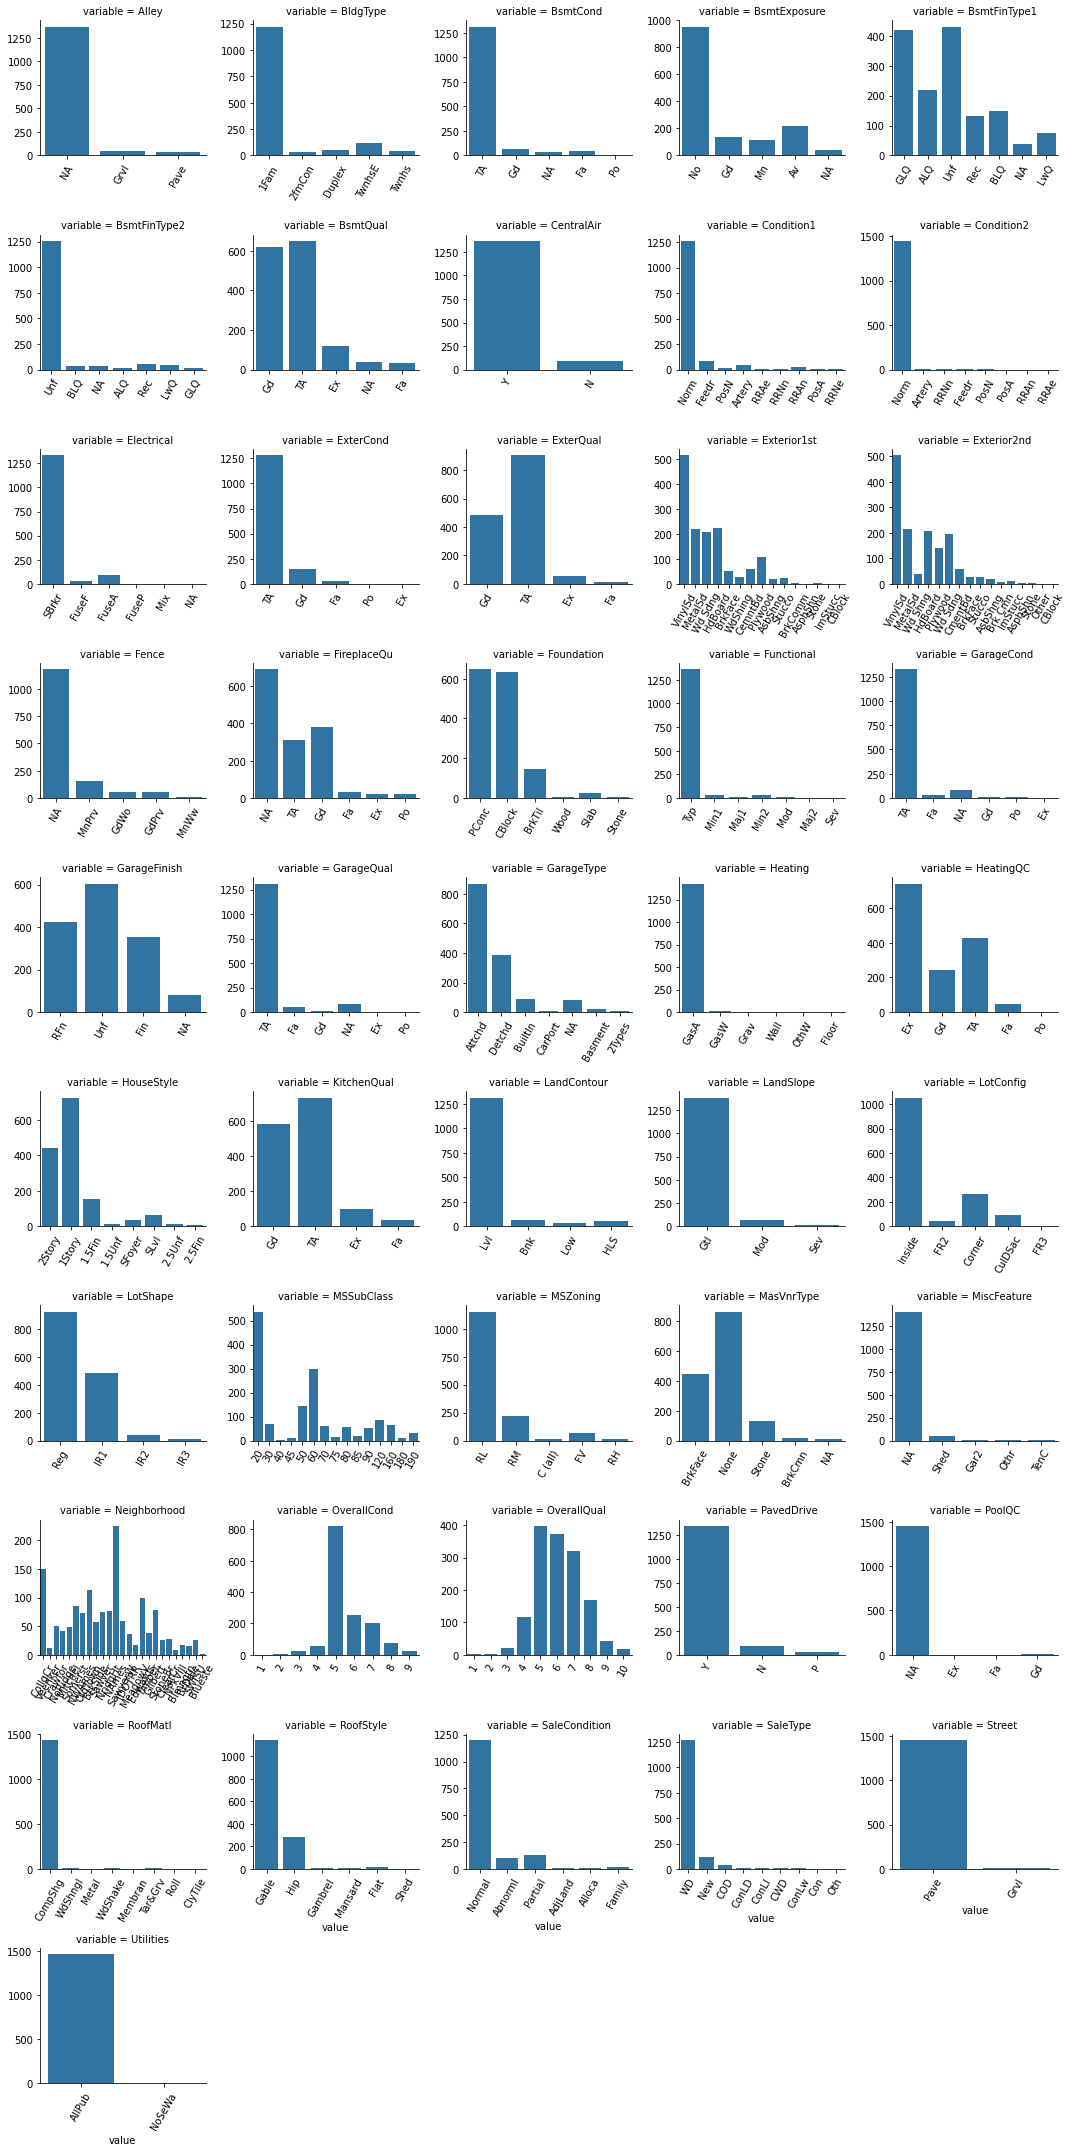

In [84]:
# Count plots of categorical features
f = pd.melt(conv_df, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=5, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


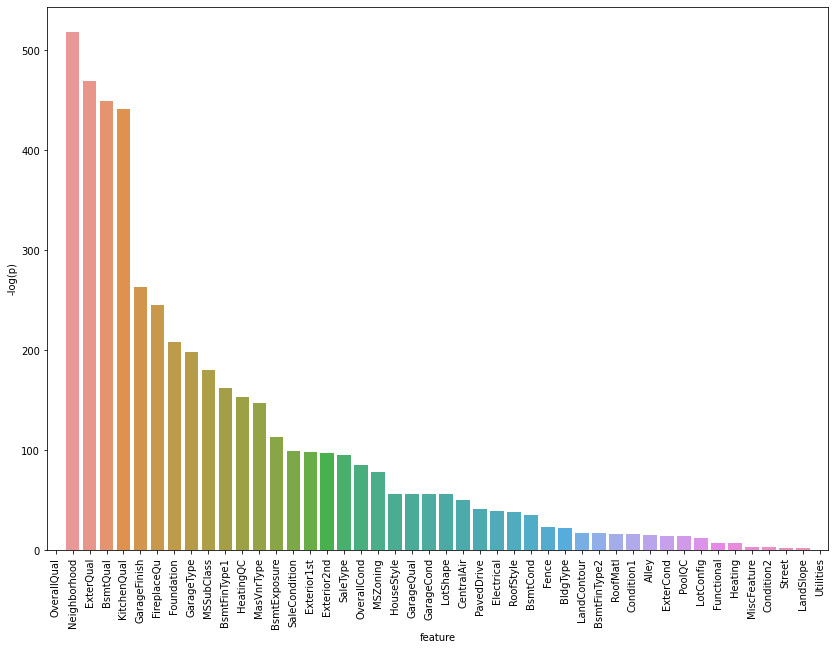

In [85]:
# In order for ANOVA to work, we have to take care of missing values first
#conv_df[catColNames] = conv_df[catColNames].fillna('Missing')

# Onward...
anova = {'feature':[], 'f':[], 'p':[]}
catAttr = catColNames + ordColNames
print(catAttr)
#catAttr.remove('OverallQual')

for cat in catAttr:
    group_prices = []
    for group in conv_df[cat].unique():
        group_prices.append(conv_df[conv_df[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

# Plot
plt.figure(figsize=(14,10))
sns.barplot(anova.feature, -np.log(anova['p']))#sns.barplot(anova.feature, np.log(1./anova['p']))
plt.ylabel('-log(p)')
plt.xticks(rotation=90)
plt.show()

In [86]:
anova.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 30 to 28
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feature  46 non-null     object 
 1   f        46 non-null     float64
 2   p        46 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.7+ KB


In [87]:
from sklearn.feature_selection import SelectKBest, f_classif

In [50]:
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
X_train = conv_df.drop('SalePrice',axis=1,inplace=False)
y_train = conv_df['SalePrice']
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

ValueError: ignored

In [72]:
# ... and go
data_w_dummies = pd.get_dummies(conv_df).copy()
print('SalePrice' in data_w_dummies.columns) 

True


In [74]:
print(list(data_w_dummies.columns))
data_w_dummies.drop('Id',axis=1,inplace=True)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandC

In [76]:
# Move SalePrice to first
salePrice = data_w_dummies['SalePrice']
data_w_dummies.drop(labels=['SalePrice'], axis=1,inplace = True)
data_w_dummies.insert(0, 'SalePrice', salePrice)

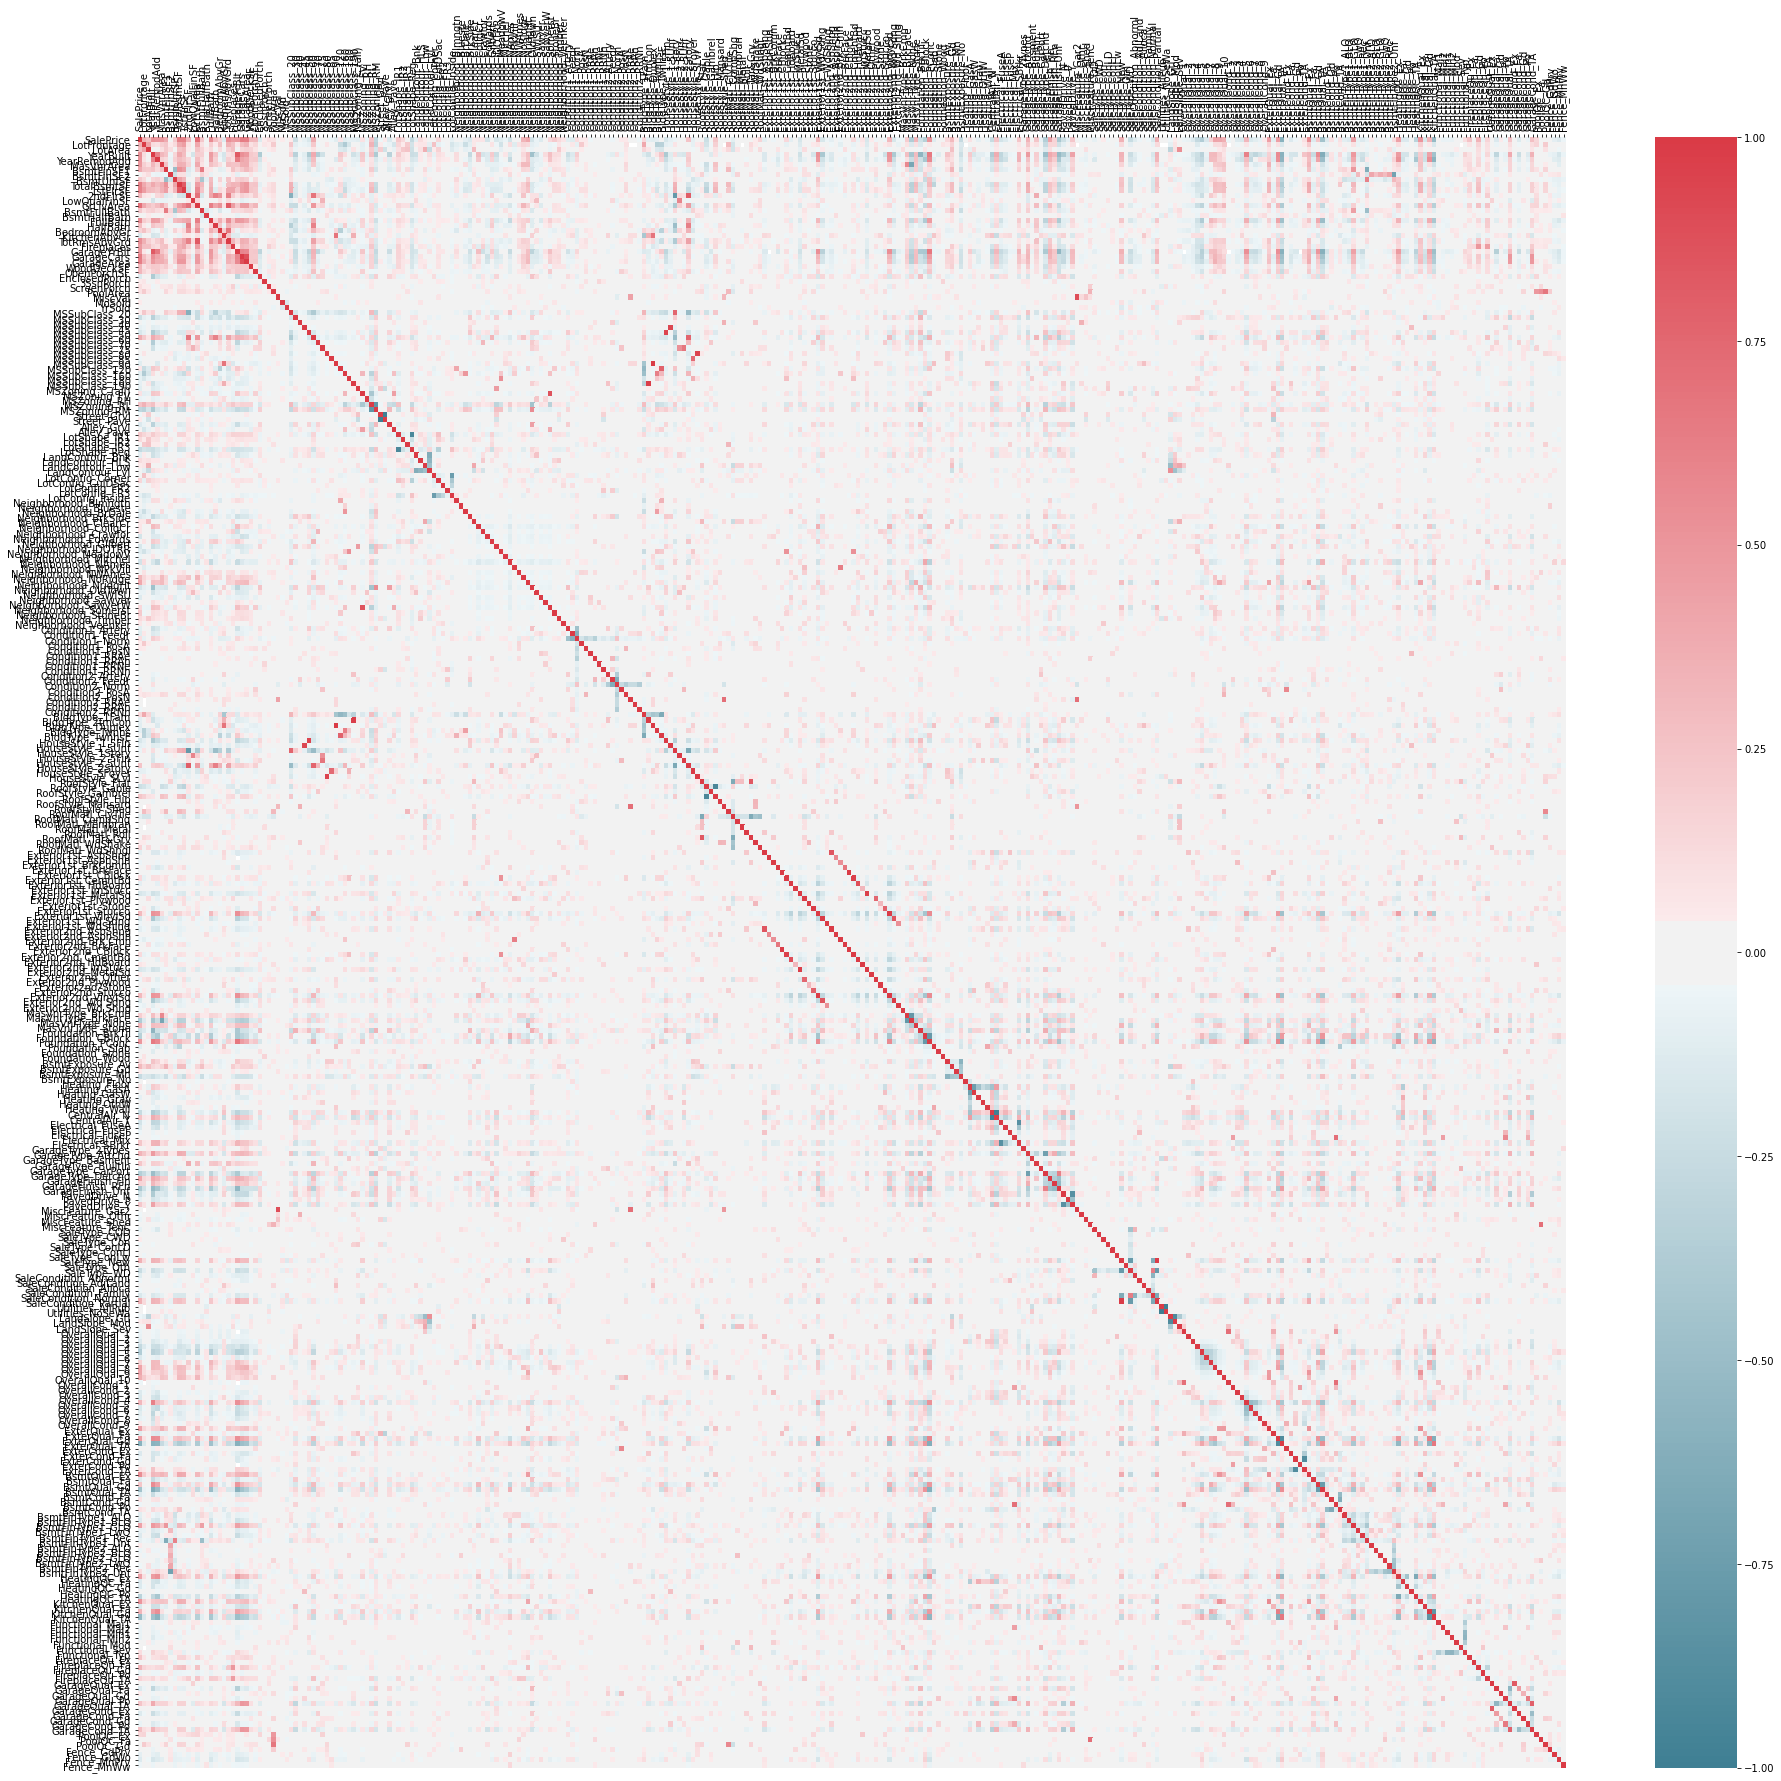

In [77]:
# Let's take a look at the correlation between categorical features
corr = data_w_dummies.corr()#corr = data_w_dummies[['SalePrice']].corr()
fig = plt.figure(figsize=(32,30))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [47]:
# Booleans
train['HasBasement'] = train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
train['WasRemodeled'] = (train.YearRemodAdd != train.YearBuilt).astype(np.int64)
train['IsNew'] = (train.YearBuilt > 2000).astype(np.int64)
train['WasCompleted'] = (train.SaleCondition != 'Partial').astype(np.int64)

boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 
                    'WasRemodeled', 'IsNew', 'WasCompleted']

30     0.000000e+00
7     1.558600e-225
32    1.439551e-204
39    3.032213e-192
17     5.791895e-91
Name: p, dtype: float64

In [ ]:
num_features, cat_features = get_feature_groups()
num_features = [f for f in num_features if f not in boolean_features]

In [ ]:
# Here we will be simplistic about it and simply
# log transform any numerical feature with a 
# skew greater than 0.5
features = num_features + ['SalePrice']
for f in features:
    train.loc[:,f] = np.log1p(train[f])